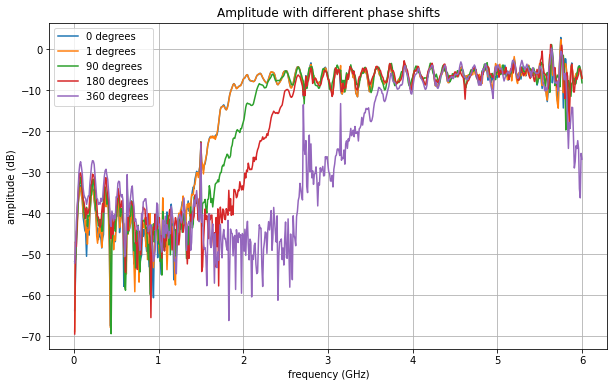

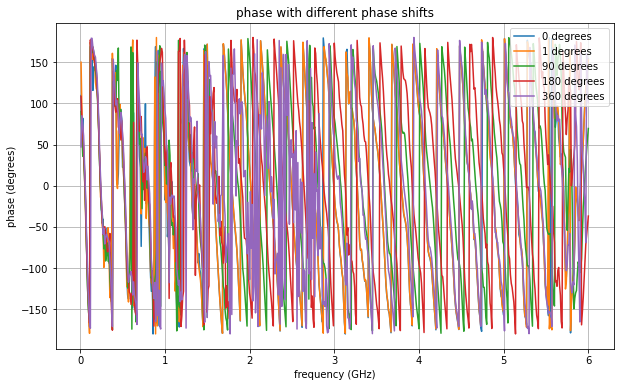

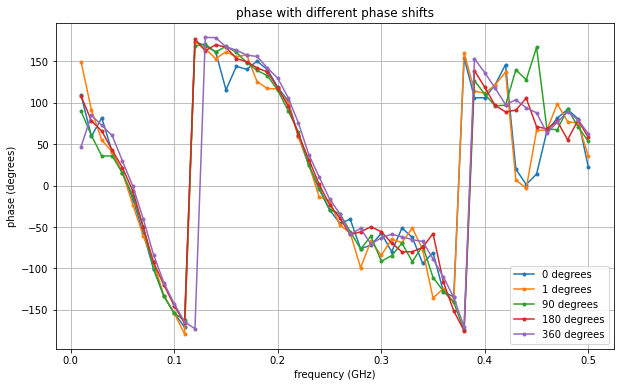

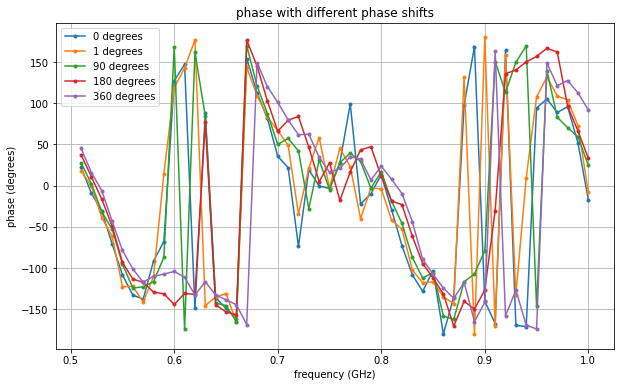

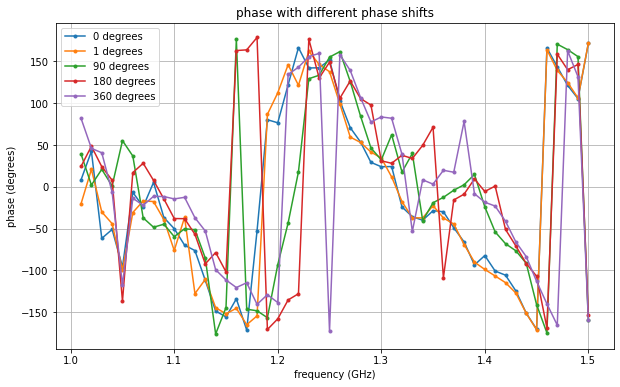

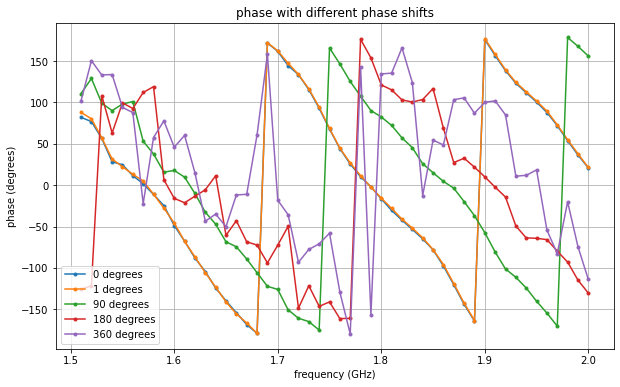

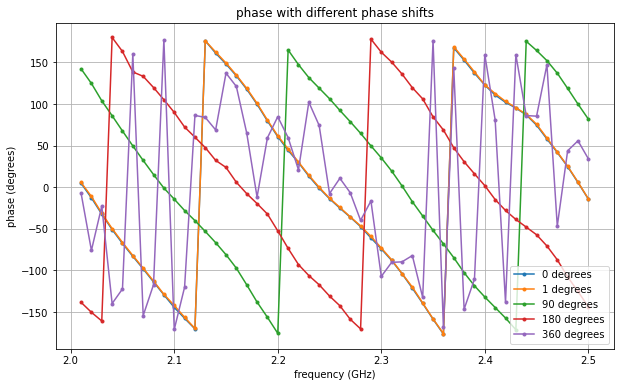

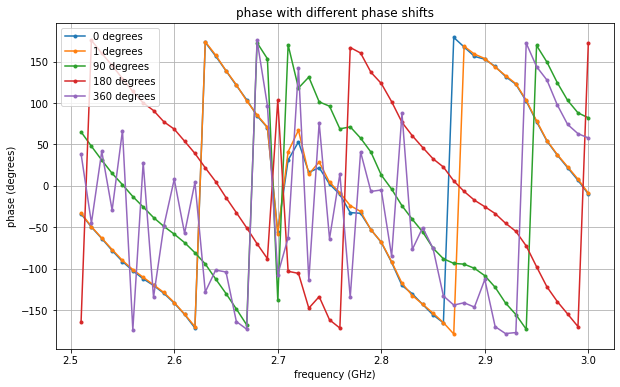

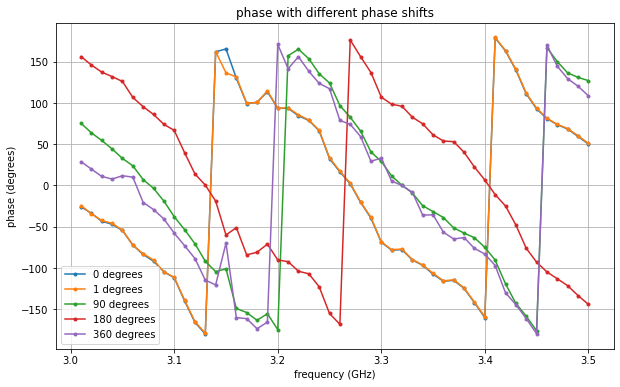

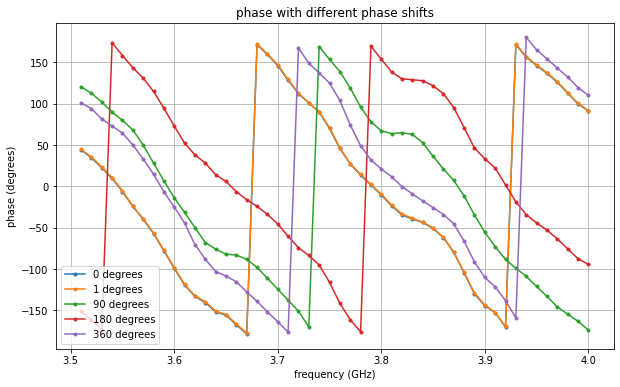

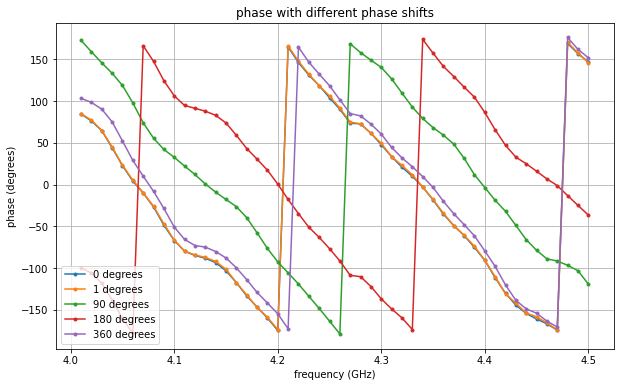

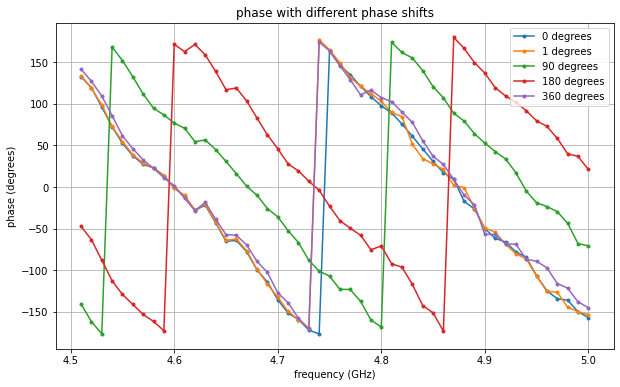

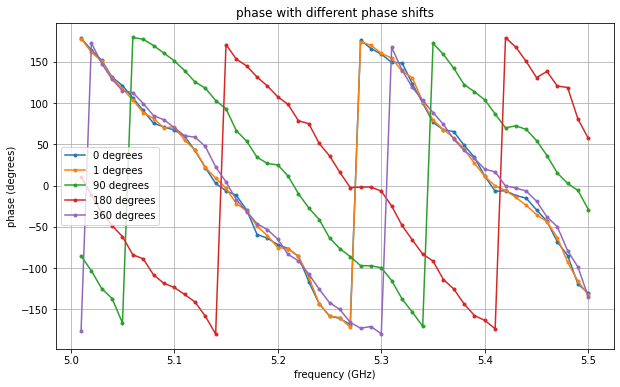

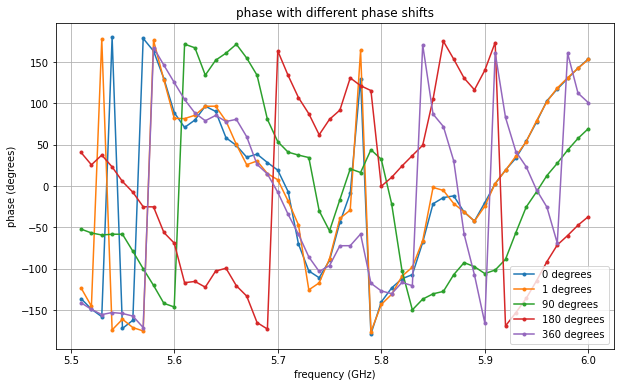

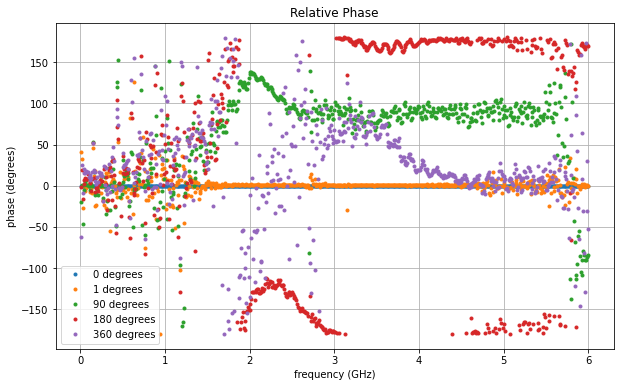

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime

# This is the folder in the same directory as this file where the csv files are stored
folder_name = "8GHz_1"

# This the folder where we want to make the subfolders where we store the graph images
save_folder = "C:/Users/Jacco/Documents/GitHub/bep-jacco-van-leenen/Code/img/"

# Setting the size of the figures
plt.rcParams['figure.figsize'] = (10,6)

# 0: Amplitude Plot 0-6GHz
# 1: Phase Plot 0-6GHz
# 2: 12 phase plots split into 0.5GHz segments
# 3: Use plt.show() on all plots
# 4: Saving all the possible plots
# 5: Plotting the phase relative to 0 degrees phase from 0-6GHz
control = {"amplitude_plot": True, "phase_plot": True, "phase_plot_split": True, 
    "phase_relative_plot": True, "show_plot": True, "save_plots": False}

def main_function(folder_name, save_folder, control):
    # Getting the csv file names from the map
    file_names = get_file_names(folder_name)

    # Get the number of data points
    num_data_points = get_num_data_points(folder_name, file_names[0])

    # Getting the matrices with data  from the csv files
    freq, s21, s21_phase = reading_files(folder_name, file_names, num_data_points)

    # Getting the phase from the file names
    phase_labels = file_labels(file_names)

    # Plotting the amplitude
    if control["amplitude_plot"] == True:
        plot_amplitude(freq, s21, phase_labels)
    # Plotting the phase
    if control["phase_plot"] == True:
        plot_phase(freq, s21_phase, phase_labels)
    # Plotting the phase split into 12 frequency segments
    if control["phase_plot_split"] == True:
        plot_phase_split(freq, s21_phase, phase_labels, num_data_points)
    # Plotting the phase relative to the 0 degrees phase
    if control["phase_relative_plot"] == True:
        plot_relative_phase(freq, s21_phase, phase_labels)
    if control["save_plots"] == True:
        plots_save(control, num_data_points, folder_name, save_folder)


    # Showing the plots, just using plt.show()
    if control["show_plot"] == True:
        showing()

# Function that gets all the file names from the specified map
# So don't put any other files but csv files in this map
def get_file_names(folder_name):    
    # Use this to get everything from the specified folder.
    # If you have a folder within this folder it will loop. That is why there is a for loop
    # You can break from this loop after one line or you just return
    for (dir_path, dir_names, file_names) in os.walk(folder_name):
        # Use this to sort the list of file names as file_180 is alphabetically before file_90
        # So it sorts on length
        file_names.sort(key=len)
        return file_names

# Getting the data by reading the files
def reading_files(folder_name, file_names, num_data_points):
    # Setting the empty arrays for the values we want to get
    freq = np.zeros((num_data_points, len(file_names)))
    s21 = np.zeros((num_data_points, len(file_names)))
    s21_phase = np.zeros((num_data_points, len(file_names)))


    for file in file_names:
        name = os.path.join(folder_name, file)
        #name = folder_name + "/" + file
        csv_reader = pd.read_csv(name, delimiter=";")
        freq[:, file_names.index(file)] = csv_reader["Frequency"]
        s21[:, file_names.index(file)] = csv_reader["S21-Magnitude (dB)"]
        s21_phase[:, file_names.index(file)] = csv_reader["S21-Phase (°)"]

    freq = freq / 1000000000
    return(freq, s21, s21_phase)

# Getting the number of data points by opening one file
def get_num_data_points(folder_name, file_name):
    name = os.path.join(folder_name, file_name)
    #name = folder_name + "/" + file_name
    with open(name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=";")
        next(csv_reader)
        return len(list(csv_reader))

def file_labels(file_names):
    labels = []

    for file in file_names:
        temp = file.split(".")
        temp2 = temp[0].split("_")
        labels.append(temp2[-1] + " degrees")
    return labels

def plot_amplitude(freq, s21, labels):
    plt.figure("amplitude")
    plt.plot(freq, s21, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels)
    plt.grid()
    plt.title("Amplitude with different phase shifts")

def plot_phase(freq, s21_phase, labels):
    plt.figure("phase")
    plt.plot(freq, s21_phase, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("phase (degrees)")
    plt.legend(labels)
    plt.grid()
    plt.title("phase with different phase shifts")

def plot_phase_split(freq, s21_phase, labels, num_data_points):
    for i in range(0, 12):
        start = int(i*num_data_points/12)
        end = int((i+1)*num_data_points/12)
        text = "Frequency: {}-{}MHz".format(10*start, 10*end)
        plt.figure(text)
        plt.plot(freq[start:end],s21_phase[start:end], ".-")
        plt.xlabel("frequency (GHz)")
        plt.ylabel("phase (degrees)")
        plt.legend(labels)
        plt.grid()
        plt.title("phase with different phase shifts")

def plot_relative_phase(freq, s21_phase, labels):
    phase = s21_phase[:, 0]
    s21_phase -= phase[:, None]
    s21_phase[s21_phase< -180] += 360
    s21_phase[s21_phase > 180] -= 360
    plt.figure("Relative Phase")
    plt.plot(freq, s21_phase, ".")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("phase (degrees)")
    plt.legend(labels)
    plt.grid()
    plt.title("Relative Phase")

def plots_save(control, num_data_points, folder_name, save_folder):
    dir = save_folder + folder_name
    if not os.path.exists(dir):
        os.mkdir(dir)
    dt = datetime.datetime.today()
    date = "{}-{}-{}".format(dt.day, dt.month, dt.year)
    dir2 = save_folder + folder_name + "/" + date
    print(dir2)
    if not os.path.exists(dir2):
        os.mkdir(dir2)
    if control["amplitude_plot"] == True:
        plt.figure("amplitude")
        name = dir2 + "/" + folder_name + "_amplitude"
        plt.savefig(name)
    if control["phase_plot"] == True:
        plt.figure("phase")
        name = dir2 + "/" + folder_name + "_phase"
        plt.savefig(name)
    if control["phase_plot_split"] == True:
        for i in range(0, 12):
            start = int(i*num_data_points/12)
            end = int((i+1)*num_data_points/12)
            text = "Frequency: {}-{}MHz".format(10*start, 10*end)
            plt.figure(text)
            name = dir2 + "/" + folder_name + "phase_{}-{}MHz".format(10*start, 10*end)
            plt.savefig(name)
    if control["phase_relative_plot"] == True:
        plt.figure("Relative Phase")
        name = dir2 + "/" + folder_name + "_relative_phase"
        plt.savefig(name)

def showing():
    plt.show()
    plt.close()

# Calling the main function
main_function(folder_name, save_folder, control)

